Problem Statement: Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, .

station - used weather station number: 1 to 25
Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
lat - Latitude (Â°): 37.456 to 37.645
lon - Longitude (Â°): 126.826 to 127.135
DEM - Elevation (m): 12.4 to 212.3
Slope - Slope (Â°): 0.1 to 5.2
Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
Please note that there are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

In [1]:
# Importing requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")

I am simply loading the file directly from the GitHub repository.


In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [4]:
df.head()  #showing first five rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.tail()  #showing last five rows

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [6]:
df.shape #Dimension of dataset

(7752, 25)

There are 7752 rows and 25 columns present in dataset.

In [7]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows',None) - main purpose of using this is it will display all rows (if more than 10 rows) instead of first 5 and last 5.


In [8]:
df.info()  #information about dataset like data type, Null values etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [9]:
df.dtypes   #datatype

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In given dataset,Date has object type dataset, whereas every other columns has float dataset.

In [10]:
df.isnull().sum()  #to check for null value.

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Except lat, lon, DEM, Slope and Solar radiation, every columns has null values.

<AxesSubplot:>

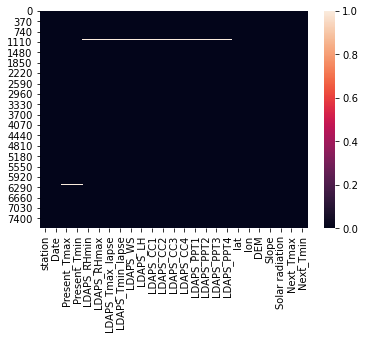

In [11]:
#Let's visualized null values.

sns.heatmap(df.isnull())

Above outcome helps to visualized null values.

In [12]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Number Of Numeric Features=',len(numeric_features))
numeric_features

Number Of Numeric Features= 24


['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [13]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Number Of Categorical Features=',len(categorical_features))
categorical_features

Number Of Categorical Features= 1


['Date']

Visulization

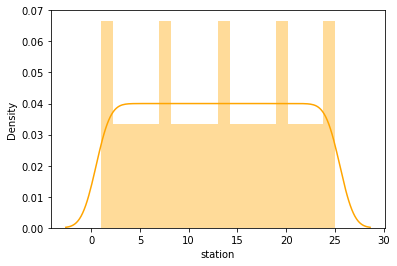

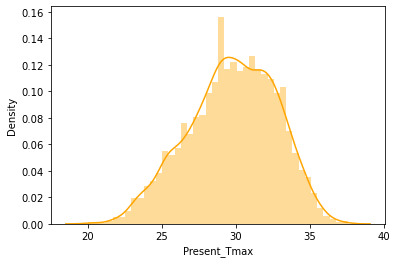

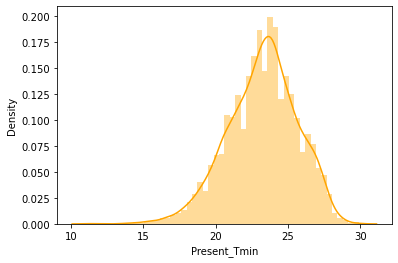

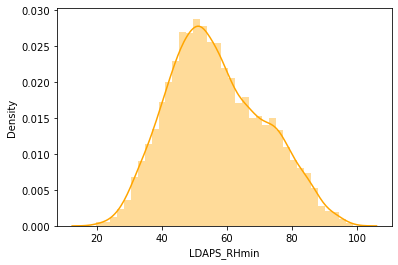

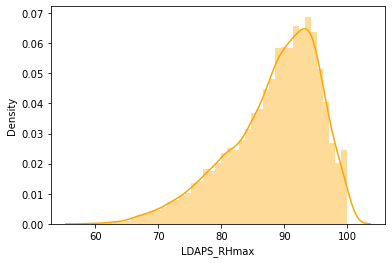

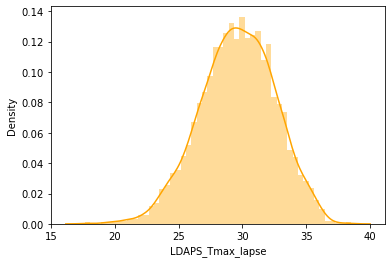

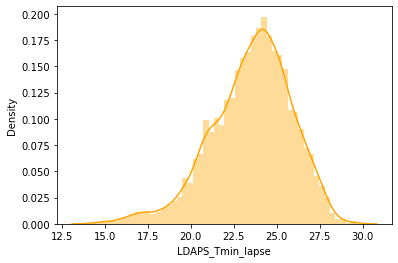

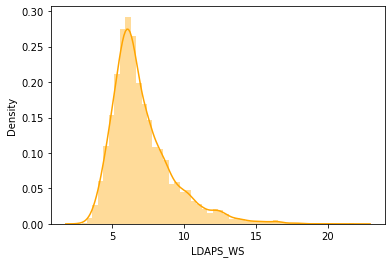

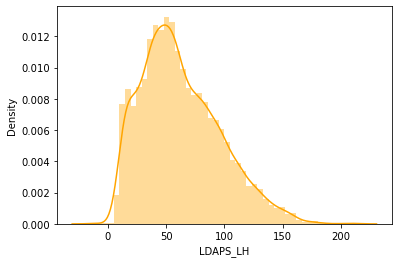

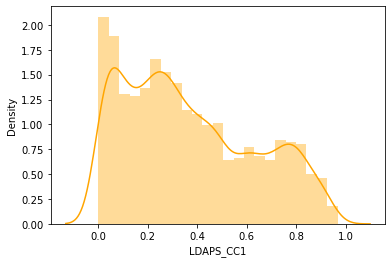

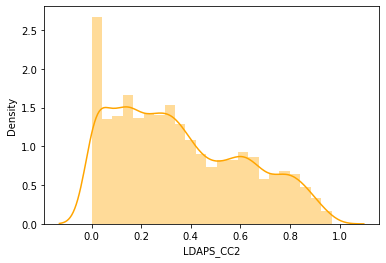

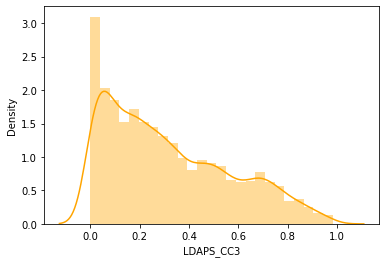

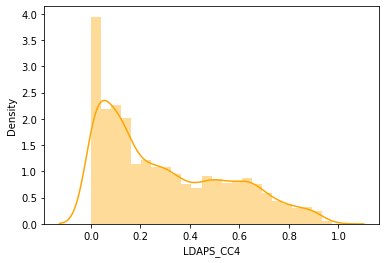

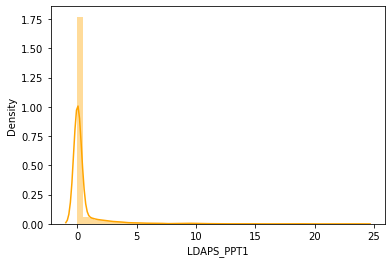

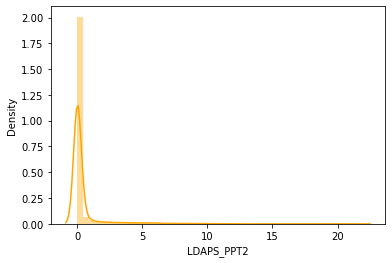

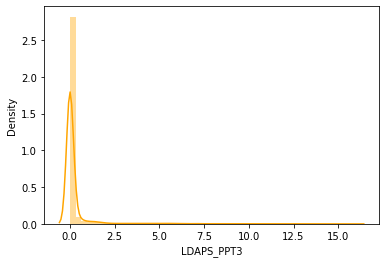

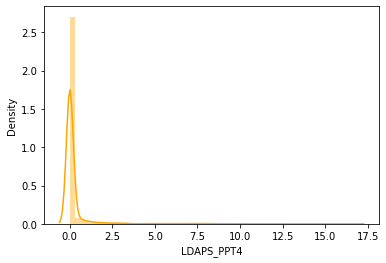

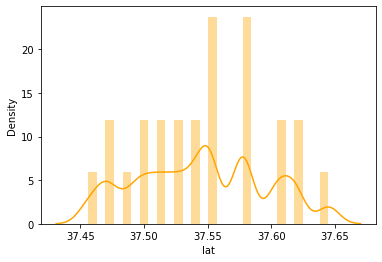

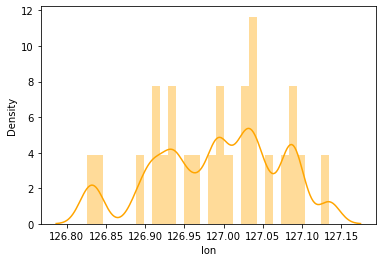

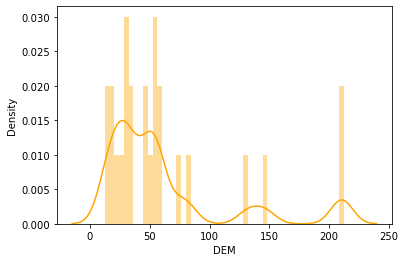

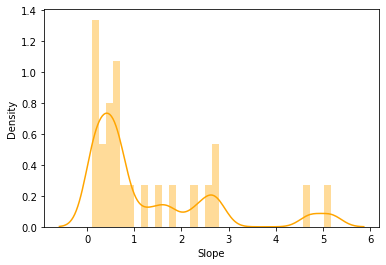

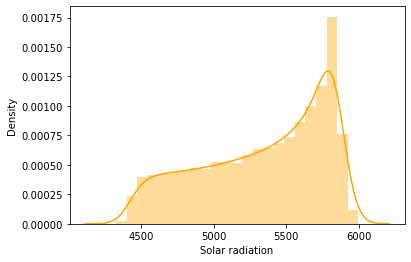

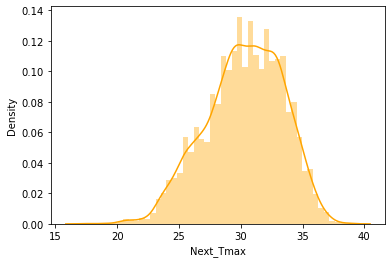

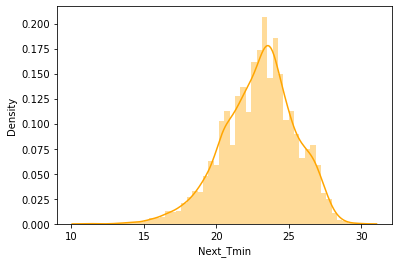

In [14]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='orange')

<AxesSubplot:xlabel='Date', ylabel='count'>

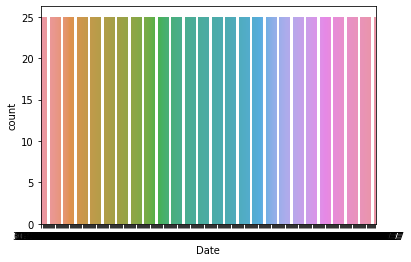

In [15]:
sns.countplot(df['Date'],data=df)

In [16]:
df['station'].fillna(df['station'].mode()[0],inplace=True)

In [17]:
df['Date'].fillna(df['Date'].mode()[0],inplace=True)

In [18]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mode()[0],inplace=True)

In [19]:
df['Present_Tmin'].fillna(df['Present_Tmin'].mode()[0],inplace=True)

In [20]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mode()[0],inplace=True)

In [21]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mode()[0],inplace=True)

In [22]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mode()[0],inplace=True)

In [23]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mode()[0],inplace=True)

In [24]:
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mode()[0],inplace=True)

In [25]:
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mode()[0],inplace=True)

In [26]:
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mode()[0],inplace=True)

In [27]:
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mode()[0],inplace=True)

In [28]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mode()[0],inplace=True)

In [29]:
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mode()[0],inplace=True)

In [30]:
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mode()[0],inplace=True)

In [31]:
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mode()[0],inplace=True)

In [32]:
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mode()[0],inplace=True)

In [33]:
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mode()[0],inplace=True)

In [34]:
df['Next_Tmax'].fillna(df['Next_Tmax'].mode()[0],inplace=True)

In [35]:
df['Next_Tmin'].fillna(df['Next_Tmin'].mode()[0],inplace=True)

In [36]:
df.isnull().sum() #checking for null values.

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

After filling NaN, There are no null values present in dataset. Let's visualized it.

<AxesSubplot:>

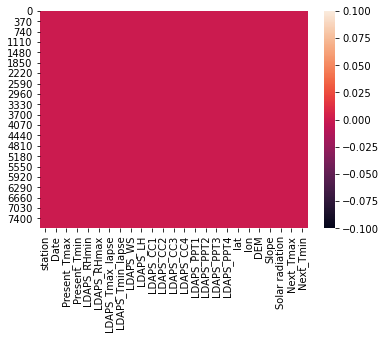

In [37]:
sns.heatmap(df.isnull())#Helps to viasalized it better for null values.

In [38]:
df['Next_Tmax'].value_counts() ##gives count

29.3    140
33.0    106
31.3    104
29.6    101
31.2     98
29.4     96
29.7     95
30.2     95
32.5     94
29.2     94
30.5     94
29.9     94
30.8     94
33.3     93
32.7     93
32.8     93
31.9     93
29.8     92
31.7     92
30.0     92
32.1     92
30.7     92
31.6     91
32.6     91
30.6     90
30.9     88
31.1     88
30.1     87
31.4     86
33.1     86
31.0     86
32.0     85
31.5     84
29.1     84
28.9     84
32.4     83
32.3     82
32.2     81
32.9     81
30.4     81
29.0     80
30.3     79
28.8     79
33.4     78
31.8     76
28.4     76
28.5     74
29.5     74
28.6     73
28.3     72
28.2     72
33.8     71
33.2     71
28.7     70
27.9     69
33.6     67
33.9     67
34.2     66
34.9     65
33.5     64
34.4     64
27.6     62
28.1     62
28.0     60
34.1     59
34.0     56
33.7     55
27.7     55
27.5     53
27.8     50
26.9     50
27.1     50
26.6     49
26.7     49
34.7     47
25.4     47
27.0     46
27.4     45
34.5     44
25.2     44
27.2     44
34.6     44
26.8     44
25.5

<AxesSubplot:xlabel='Next_Tmax'>

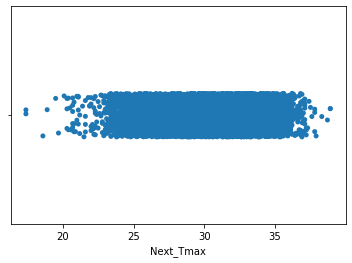

In [39]:
sns.stripplot(df['Next_Tmax'],data=df)

In [40]:
df['Next_Tmin'].value_counts() ##gives count

23.5    186
23.4    157
24.0    156
23.2    150
23.8    149
23.9    142
23.7    135
23.6    133
22.1    133
23.1    129
22.7    127
22.8    125
23.3    125
22.9    123
24.3    122
22.4    120
23.0    119
24.1    116
24.2    116
22.5    113
24.8    111
24.4    103
22.6    102
24.5    102
22.0    102
21.5    102
22.2    101
24.6    100
21.9     99
21.8     99
24.7     99
21.4     95
20.7     94
20.9     92
21.7     92
20.5     91
21.3     90
21.2     89
24.9     87
22.3     85
25.3     84
25.2     81
25.0     81
21.6     77
25.7     76
26.0     75
25.1     75
20.4     73
20.8     72
25.4     71
21.0     71
20.1     69
20.3     68
25.8     66
21.1     66
26.2     65
20.6     65
20.2     62
26.5     61
25.6     58
26.8     58
26.3     55
26.6     53
26.7     52
27.0     52
25.5     52
20.0     51
26.1     49
19.6     48
25.9     47
19.9     47
19.8     46
26.9     45
26.4     45
19.5     44
19.7     41
19.0     39
19.1     37
19.4     36
27.1     36
27.5     35
19.3     34
27.2     34
19.2

<AxesSubplot:xlabel='Next_Tmin'>

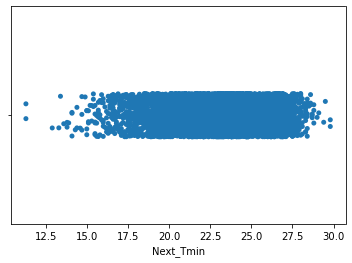

In [41]:
sns.stripplot(df['Next_Tmin'],data=df)

In [42]:
data1 = df['Next_Tmax'].value_counts()  #storing values in data

In [43]:
data2 = df['Next_Tmin'].value_counts()  #storing values in data

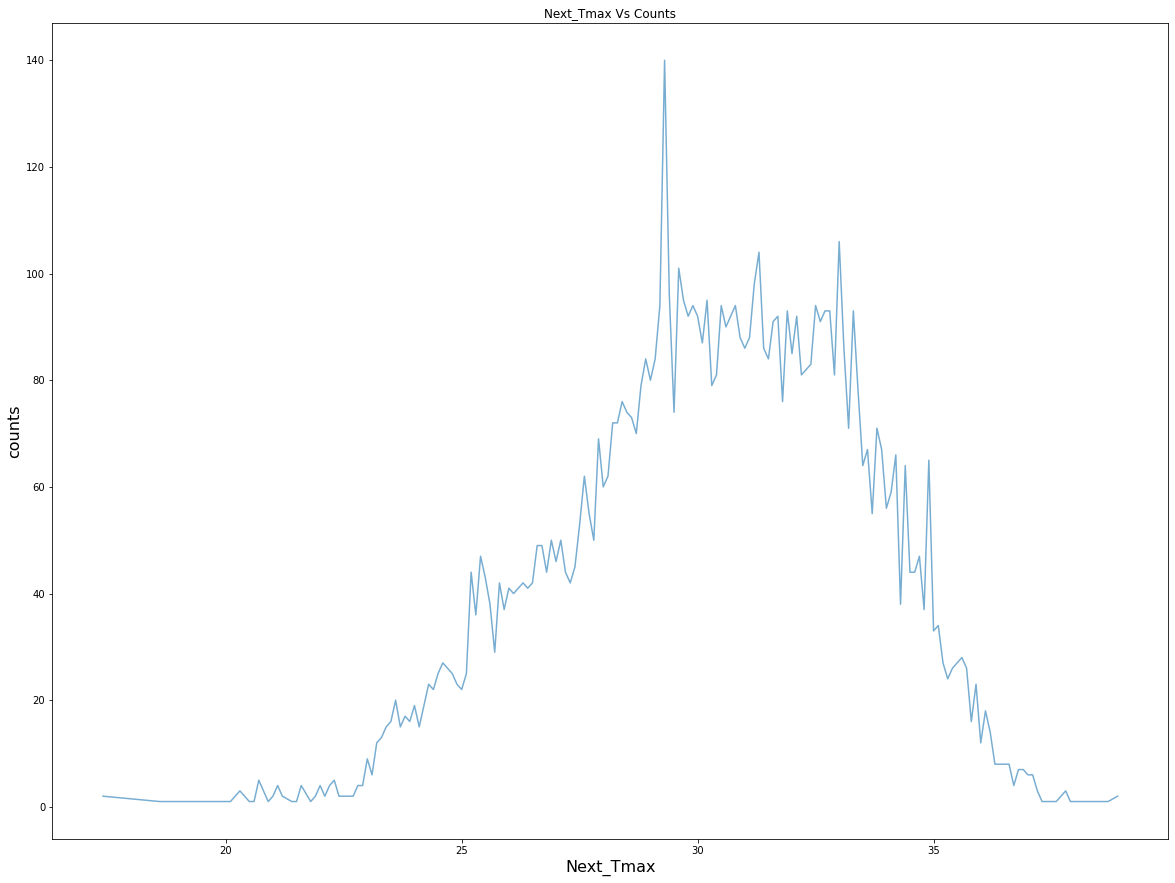

In [44]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.lineplot(data1.index,data1.values,alpha=0.6)
plt.xlabel('Next_Tmax', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Next_Tmax Vs Counts')
plt.show()

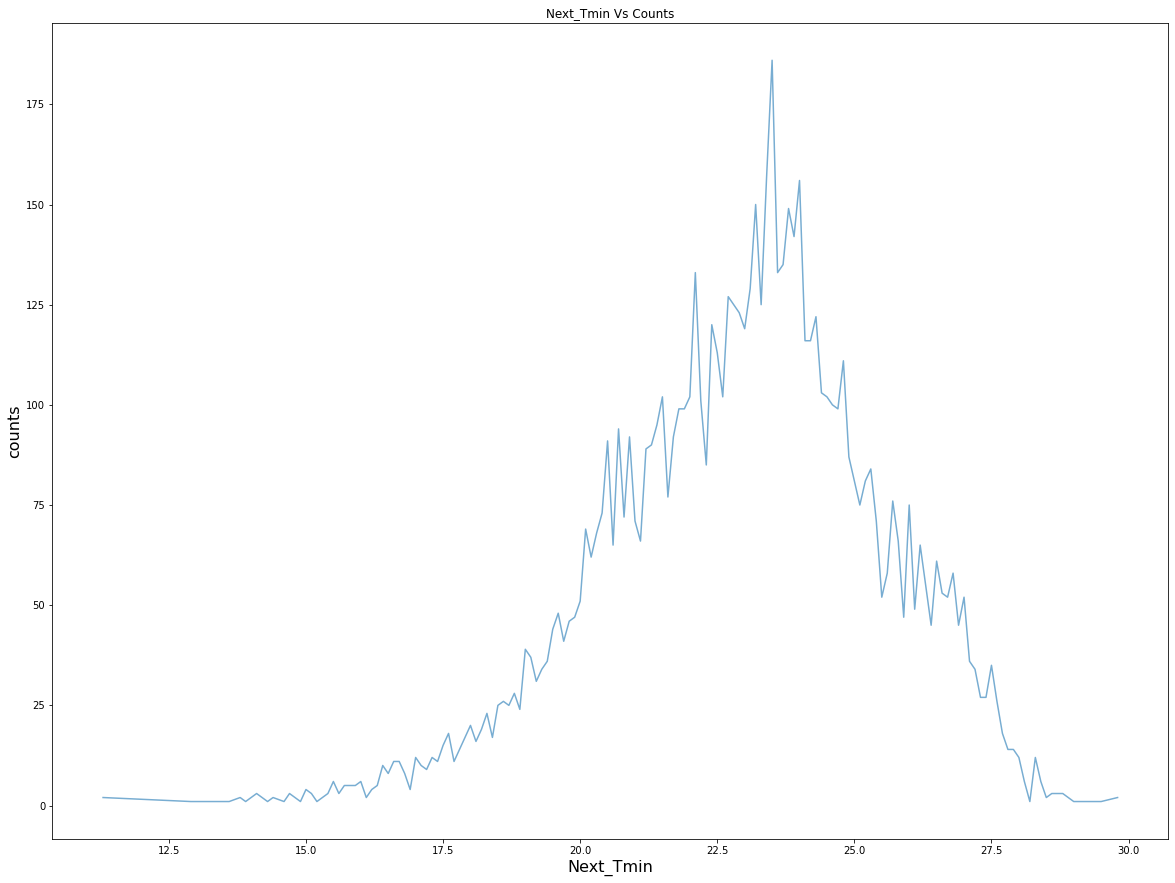

In [45]:
#Let's visualized it thorugh bargraph.

plt.figure(figsize=(20,15))
sns.lineplot(data2.index,data2.values,alpha=0.6)
plt.xlabel('Next_Tmin', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Next_Tmin Vs Counts')
plt.show()

LineGraph help to understand dataset better.

In [46]:
df = df.drop(columns=['Date']) #removing unnecessary columns

In [47]:
df.shape

(7752, 24)

In [48]:
df.describe()  #statstical summary

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,0.365206,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,0.263668,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Describe method gives stastical details like count, mean, std, min, max, 25%, 50%, 75%. Above outcome shows, There are outiler present in dataset by comparing mean and 50% value. There is major difference between them like in LDAPS_RHmin, LDAPS_RHmax, LDAPS_LH etc.

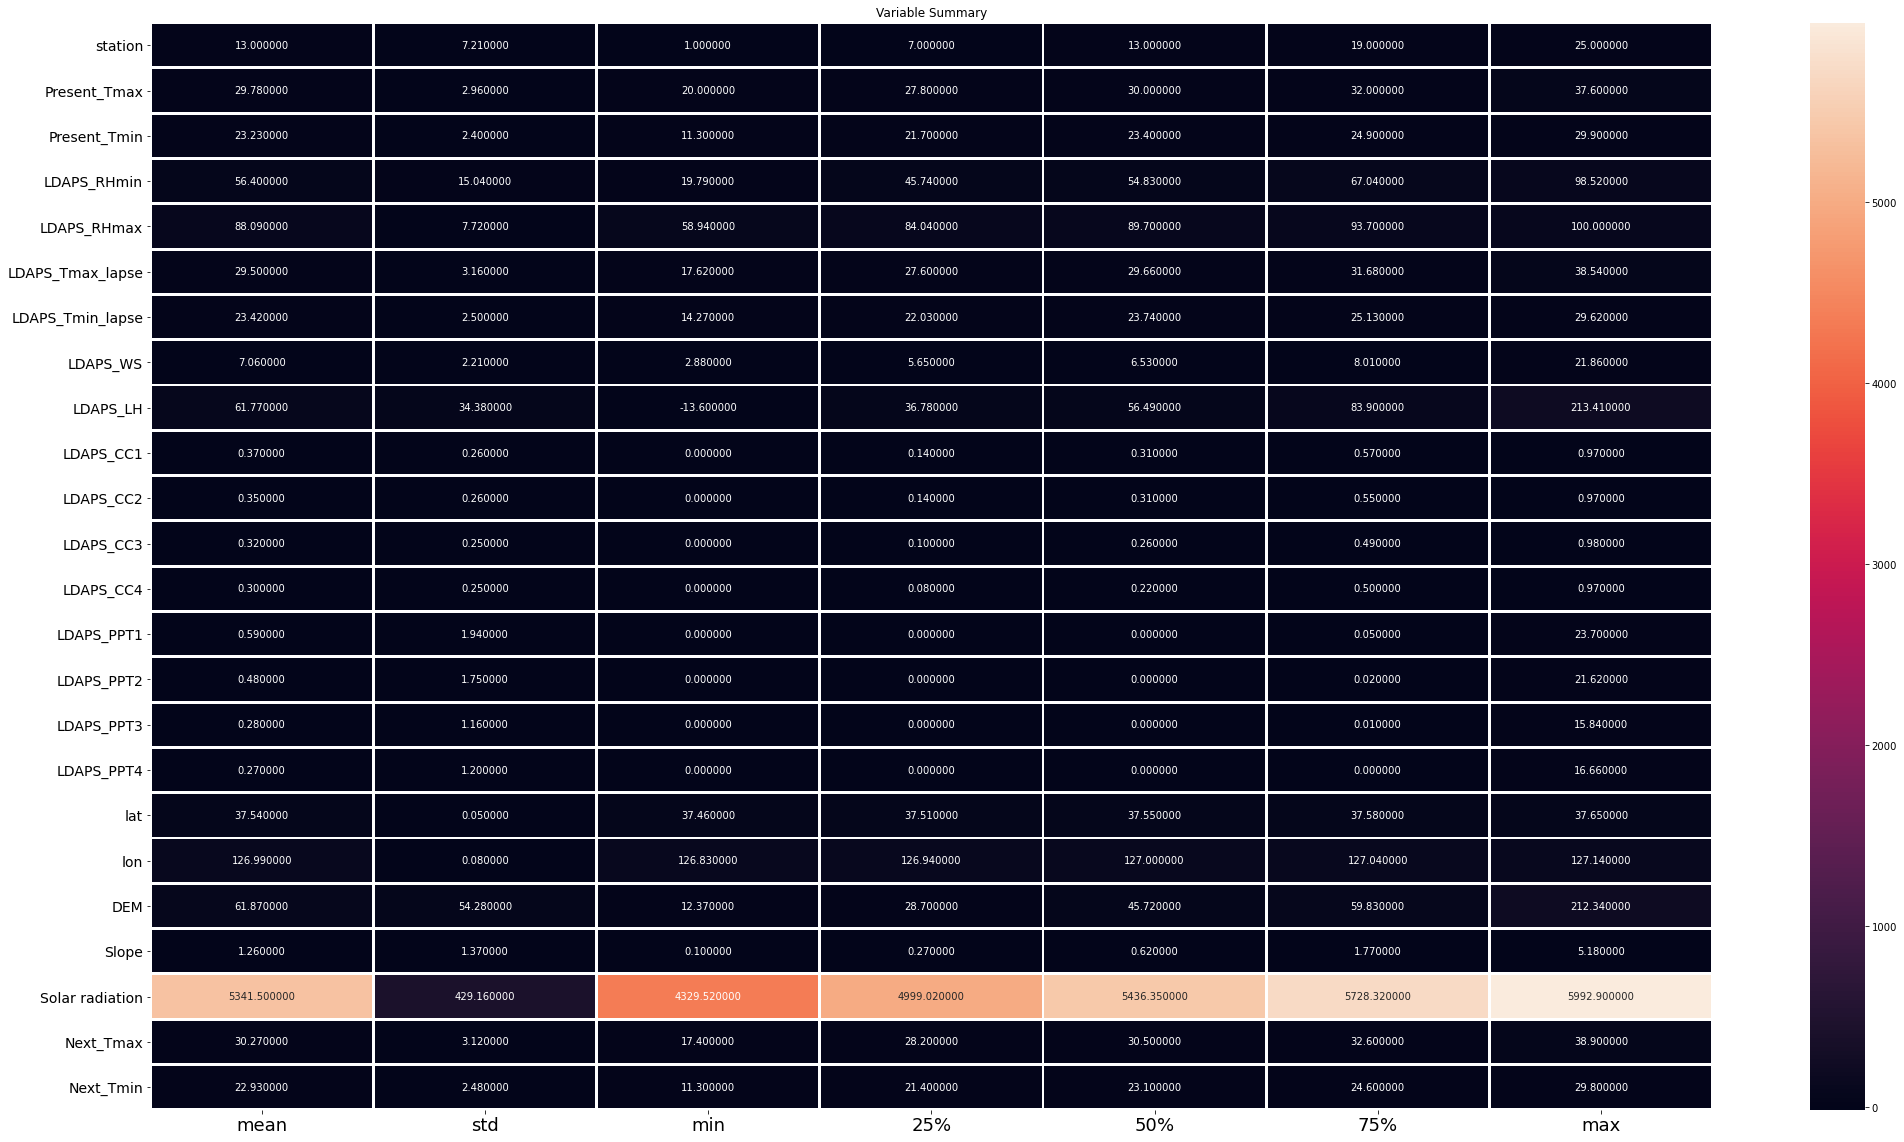

In [49]:
#lets visulized dataset

plt.figure(figsize=(35,20))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=14)
plt.title("Variable Summary")
plt.show()

Above outcome helps to understand relation between various varibales better.

In [50]:
corr = df.corr() # Checking for correlation

In [51]:
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.111707,0.131483,-0.064828,-0.154365,0.064331,0.097898,0.004152,-0.130618,0.006658,...,-0.010771,-0.015291,-0.013277,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.108569,0.128390
Present_Tmax,0.111707,1.000000,0.619221,-0.214998,-0.305792,0.501246,0.554768,-0.132777,0.116041,-0.318215,...,-0.101060,-0.121982,-0.100315,-0.053099,0.008635,-0.187098,-0.106605,-0.024943,0.608681,0.621846
Present_Tmin,0.131483,0.619221,1.000000,0.090367,-0.059385,0.384882,0.666980,-0.056793,-0.035814,0.066901,...,0.064903,-0.049043,-0.065192,-0.078764,-0.043659,-0.250294,-0.146821,0.053823,0.470941,0.796333
LDAPS_RHmin,-0.064828,-0.214998,0.090367,1.000000,0.611314,-0.419389,0.167924,0.325582,-0.015007,0.623117,...,0.385851,0.239174,0.168888,0.084541,-0.073998,0.099121,0.120115,0.248989,-0.454425,0.070956
LDAPS_RHmax,-0.154365,-0.305792,-0.059385,0.611314,1.000000,-0.182835,0.036238,0.193008,0.296986,0.452374,...,0.222500,0.133626,0.117501,0.181629,0.023808,0.164355,0.203716,0.157210,-0.308550,-0.100040
LDAPS_Tmax_lapse,0.064331,0.501246,0.384882,-0.419389,-0.182835,1.000000,0.700427,-0.215284,0.124012,-0.352365,...,-0.214661,-0.165856,-0.140607,-0.039079,0.084176,-0.166084,-0.150705,0.063188,0.723211,0.511372
LDAPS_Tmin_lapse,0.097898,0.554768,0.666980,0.167924,0.036238,0.700427,1.000000,-0.051714,-0.044372,0.059542,...,0.010587,-0.074058,-0.080301,-0.089752,-0.024898,-0.182240,-0.173282,0.167306,0.503437,0.788360
LDAPS_WS,0.004152,-0.132777,-0.056793,0.325582,0.193008,-0.215284,-0.051714,1.000000,0.046855,0.307226,...,0.193496,0.163195,0.145619,0.036014,-0.058423,0.187704,0.168621,0.128987,-0.359371,-0.111450
LDAPS_LH,-0.130618,0.116041,-0.035814,-0.015007,0.296986,0.124012,-0.044372,0.046855,1.000000,-0.112777,...,-0.069813,0.020818,0.024259,0.130056,0.025208,0.053829,0.084725,-0.035381,0.127318,-0.073270
LDAPS_CC1,0.006658,-0.318215,0.066901,0.623117,0.452374,-0.352365,0.059542,0.307226,-0.112777,1.000000,...,0.389348,0.170330,0.093844,-0.008054,-0.006779,-0.013954,-0.020553,0.223127,-0.465100,-0.022926


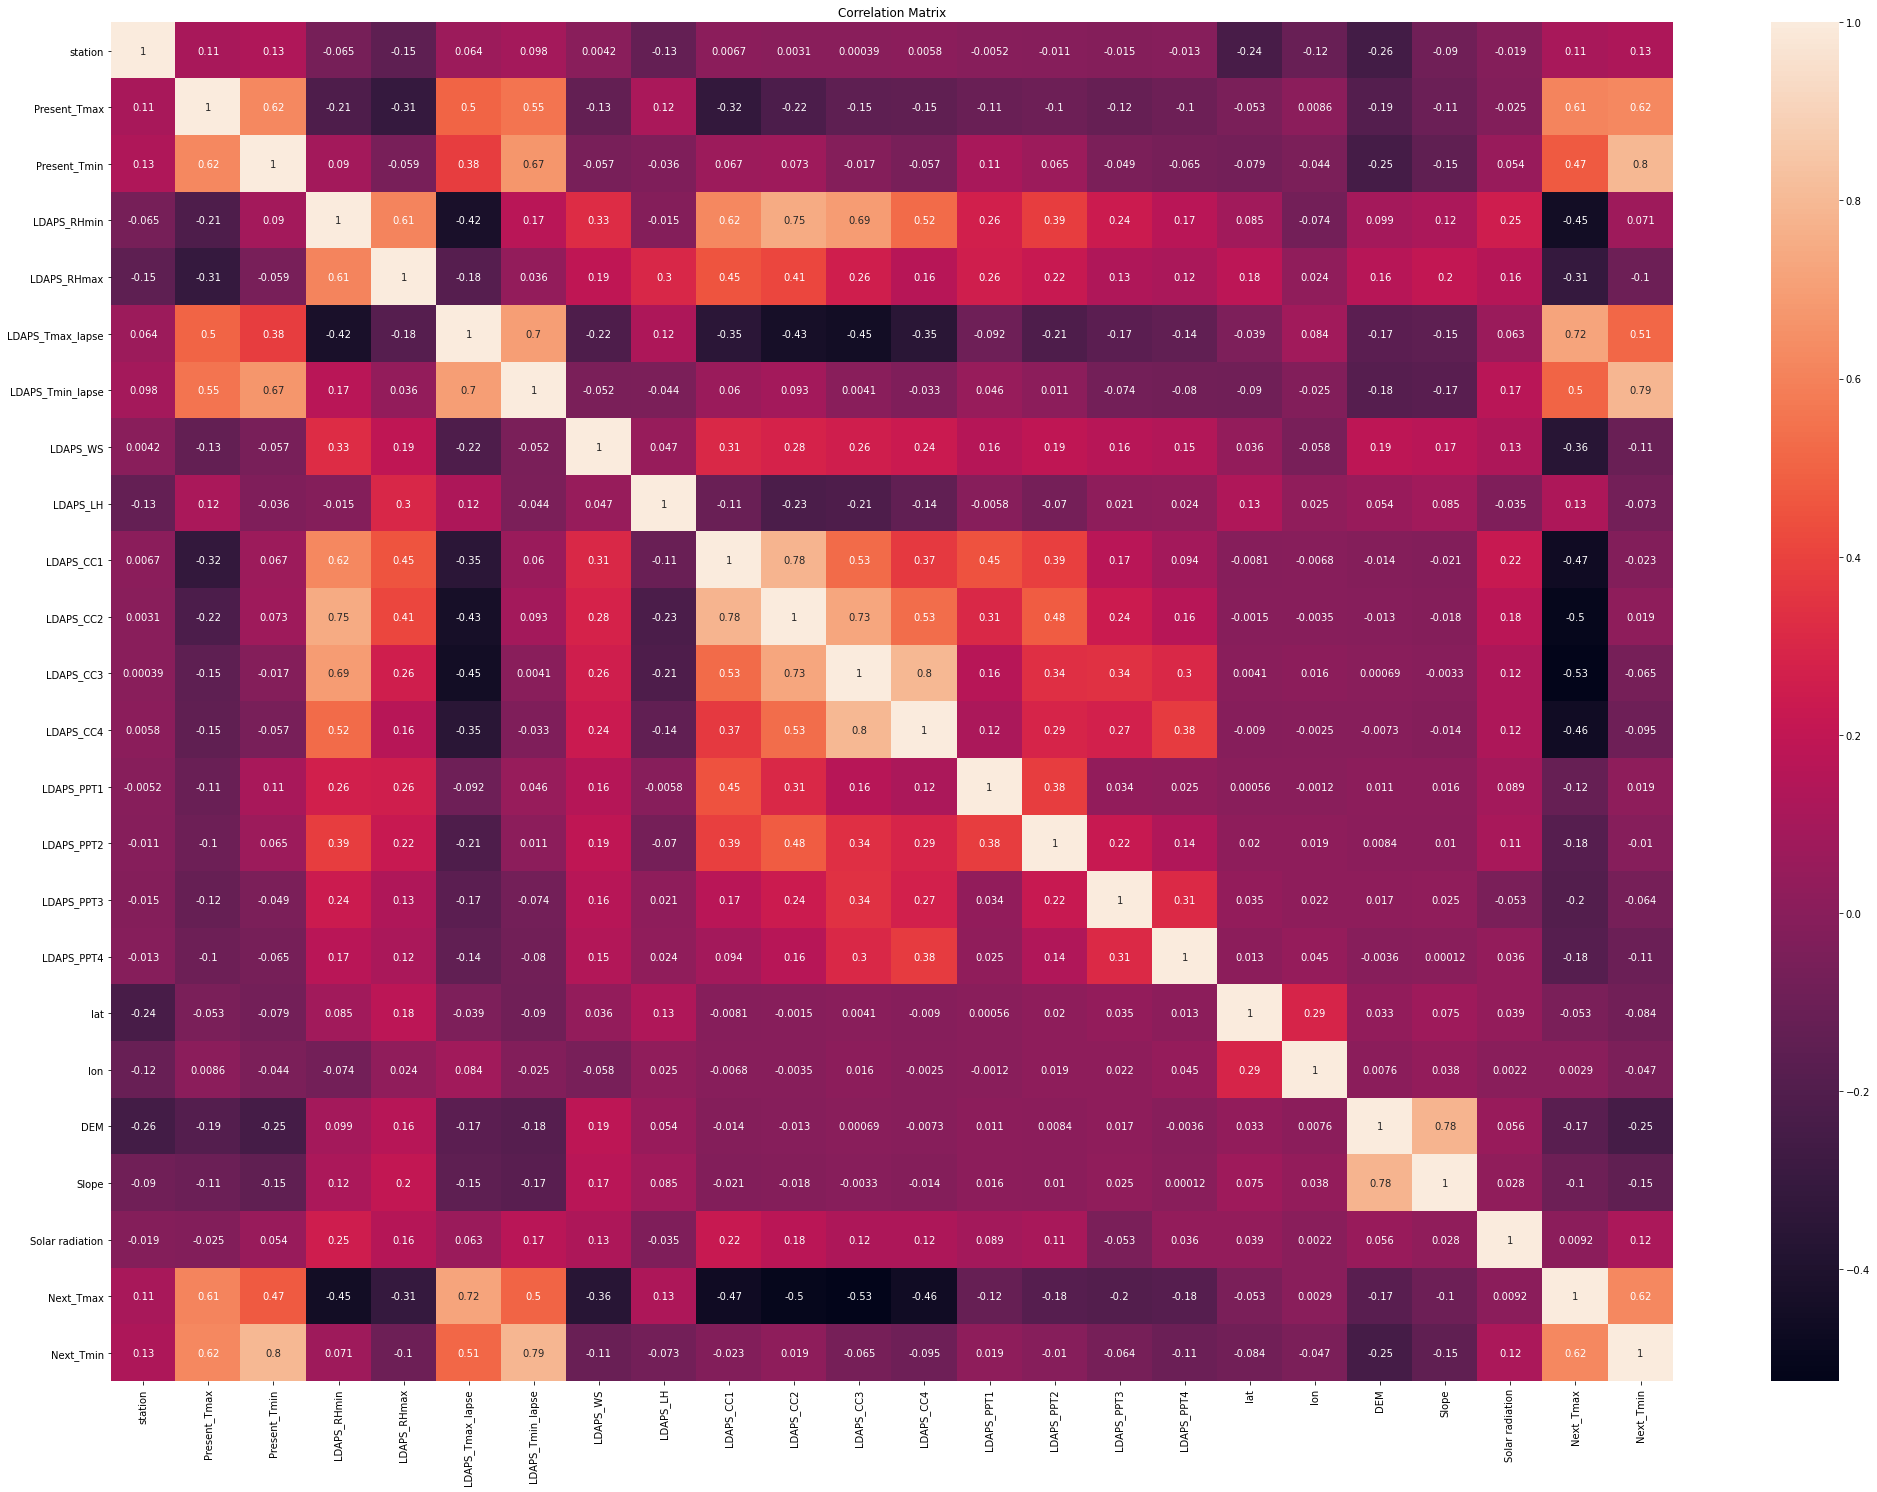

In [52]:
# visulization of correlated values.

plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

All columns of database are positively correlated. station has 13%, Present_Tmax has 62%, Present_Tmin has 80%, LDAPS_RHmin has 7.1%, LDAPS_RHmax has -10%, LDAPS_Tmax_lapse has 51%, LDAPS_Tmin_lapse has 79%, LDAPS_WS has -11%, LDAPS_LH has -7.3%, LDAPS_CC1 has -2.3%, LDAPS_CC2 has 1.9%, LDAPS_CC3 has -6.5%, LDAPS_CC4 has -9.5%, LDAPS_PPT1 has 1.9%, LDAPS_PPT2 has -1%, LDAPS_PPT3 has -6.4%, LDAPS_PPT4 has -11%, lat has -8.4%, lon has -4.7%, DEM has -25%, slope has -15%, Solar radiation has 12% coorelation with target value. Max Correlation: Present_Tmin Min Correlation: DEM

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [55]:
valcal()

       vif factor          features
0        5.107826           station
1      294.320684      Present_Tmax
2      315.674840      Present_Tmin
3       99.758300       LDAPS_RHmin
4      327.891338       LDAPS_RHmax
5      697.934214  LDAPS_Tmax_lapse
6      899.891577  LDAPS_Tmin_lapse
7       14.994342          LDAPS_WS
8        6.620015          LDAPS_LH
9       10.515627         LDAPS_CC1
10      15.183526         LDAPS_CC2
11      13.702901         LDAPS_CC3
12       7.195707         LDAPS_CC4
13       1.551324        LDAPS_PPT1
14       1.633708        LDAPS_PPT2
15       1.353526        LDAPS_PPT3
16       1.337178        LDAPS_PPT4
17  650729.300571               lat
18  648779.083996               lon
19       7.404383               DEM
20       5.556445             Slope
21     186.934028   Solar radiation
22     439.349756         Next_Tmax
23     499.972460         Next_Tmin


station                AxesSubplot(0.125,0.799681;0.110714x0.0803191)
Present_Tmax        AxesSubplot(0.257857,0.799681;0.110714x0.0803191)
Present_Tmin        AxesSubplot(0.390714,0.799681;0.110714x0.0803191)
LDAPS_RHmin         AxesSubplot(0.523571,0.799681;0.110714x0.0803191)
LDAPS_RHmax         AxesSubplot(0.656429,0.799681;0.110714x0.0803191)
LDAPS_Tmax_lapse    AxesSubplot(0.789286,0.799681;0.110714x0.0803191)
LDAPS_Tmin_lapse       AxesSubplot(0.125,0.703298;0.110714x0.0803191)
LDAPS_WS            AxesSubplot(0.257857,0.703298;0.110714x0.0803191)
LDAPS_LH            AxesSubplot(0.390714,0.703298;0.110714x0.0803191)
LDAPS_CC1           AxesSubplot(0.523571,0.703298;0.110714x0.0803191)
LDAPS_CC2           AxesSubplot(0.656429,0.703298;0.110714x0.0803191)
LDAPS_CC3           AxesSubplot(0.789286,0.703298;0.110714x0.0803191)
LDAPS_CC4              AxesSubplot(0.125,0.606915;0.110714x0.0803191)
LDAPS_PPT1          AxesSubplot(0.257857,0.606915;0.110714x0.0803191)
LDAPS_PPT2          

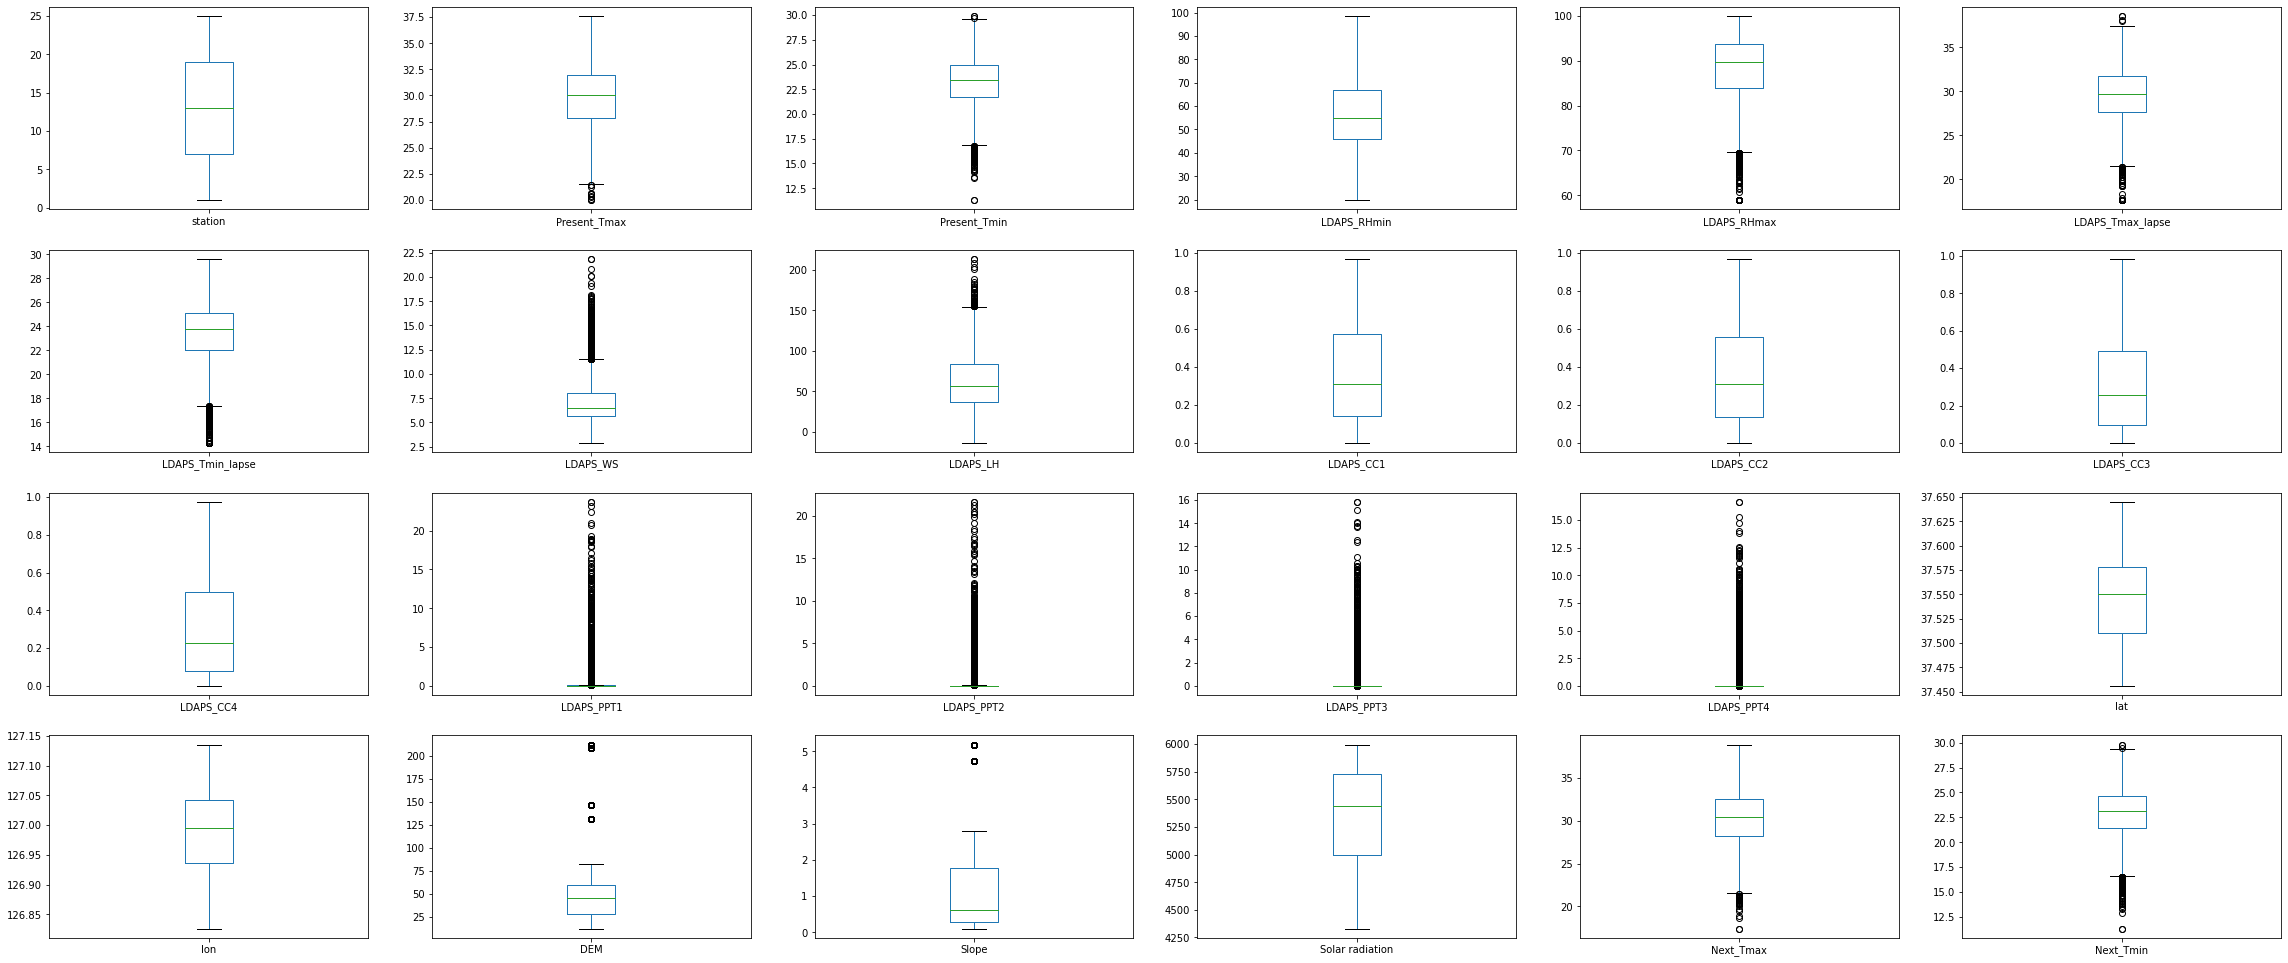

In [56]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(40,35))

Above both outcome show outlier present in columns.

In [57]:
from scipy.stats import zscore 
from scipy import stats    #Importing requried library.
z = np.abs(stats.zscore(df))
z.shape

(7752, 24)

In [58]:
index = (np.where(z>7)[0])
df = df.drop(df.index[index])
df.shape

(7619, 24)

After applying zscore method, We got new dataset with 7619 rows and 24 columns.

In [59]:
loss_percent=(7752-7619)/7752*100
print(loss_percent)

1.715686274509804


After removing skewness - total data lost is 1.7156%.

In [60]:
df.skew() #to check skewness

station            -0.001210
Present_Tmax       -0.291902
Present_Tmin       -0.383474
LDAPS_RHmin         0.207022
LDAPS_RHmax        -1.096611
LDAPS_Tmax_lapse   -0.621092
LDAPS_Tmin_lapse   -0.859525
LDAPS_WS            1.476459
LDAPS_LH            0.573309
LDAPS_CC1           0.479767
LDAPS_CC2           0.476060
LDAPS_CC3           0.664357
LDAPS_CC4           0.688315
LDAPS_PPT1          4.585924
LDAPS_PPT2          4.697430
LDAPS_PPT3          5.740124
LDAPS_PPT4          6.550165
lat                 0.086349
lon                -0.282312
DEM                 1.724629
Slope               1.567143
Solar radiation    -0.513336
Next_Tmax          -0.339540
Next_Tmin          -0.413739
dtype: float64

In [61]:
from sklearn.preprocessing import power_transform

In [63]:
# remove skewness
x1=power_transform(df,method='yeo-johnson')
x1=pd.DataFrame(df)

In [64]:
x1.skew()

station            -0.001210
Present_Tmax       -0.291902
Present_Tmin       -0.383474
LDAPS_RHmin         0.207022
LDAPS_RHmax        -1.096611
LDAPS_Tmax_lapse   -0.621092
LDAPS_Tmin_lapse   -0.859525
LDAPS_WS            1.476459
LDAPS_LH            0.573309
LDAPS_CC1           0.479767
LDAPS_CC2           0.476060
LDAPS_CC3           0.664357
LDAPS_CC4           0.688315
LDAPS_PPT1          4.585924
LDAPS_PPT2          4.697430
LDAPS_PPT3          5.740124
LDAPS_PPT4          6.550165
lat                 0.086349
lon                -0.282312
DEM                 1.724629
Slope               1.567143
Solar radiation    -0.513336
Next_Tmax          -0.339540
Next_Tmin          -0.413739
dtype: float64

In [65]:
x=x1

A. By taking Next_Tmax as Target value

In [66]:
#splitting dataset into x and y.

y = df['Next_Tmax']
x = df.drop(columns=['Next_Tmax'])

In [67]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5


In [68]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [69]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66616477, -0.37281249, -0.75861043, ...,  1.11783472,
         1.52156079, -0.69765552],
       [-1.52742848,  0.70823731, -0.67550807, ..., -0.54088007,
         1.23354808, -0.17556168],
       [-1.38869219,  0.60688889,  0.03086208, ..., -0.72202467,
         1.22013171,  0.38669323],
       ...,
       [ 1.52476993, -2.19708403, -2.29600427, ..., -0.75401714,
        -2.10127113, -1.66152108],
       [ 1.66350622, -2.23086683, -2.42065782, ..., -0.71822647,
        -2.07104049, -2.22377599],
       [-1.66616477, -3.31191663, -4.95528009, ..., -0.84446191,
        -2.35495433, -4.67360095]])

In [70]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

Step 6. Model training using ML algorithm

In [71]:
# Model instantiating and training. As the label data is contineous so we can used linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,roc_auc_score

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [72]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

30.292130089234753
[ 0.13635472  0.4344458  -0.06505067  0.01968699 -0.14520608  1.31984707
 -0.77857813 -0.45605918  0.16769338 -0.22326732 -0.32633634 -0.21873632
 -0.3643335   0.02363565  0.27174578  0.00437651  0.12678941  0.01735918
 -0.07303493  0.10741682 -0.00444348  0.12245609  1.57675788]


In [73]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.7838075064755885

In [74]:
regression.score(x_test,y_test)

0.7799358041314153

In [75]:
y_pred = regression.predict(x_test)
y_pred

array([30.71197986, 29.70889451, 34.91559405, ..., 35.52152873,
       32.09041605, 30.83126141])

In [76]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
7436,27.4,30.711980
3476,28.6,29.708895
7017,34.4,34.915594
920,27.6,29.230589
7557,28.9,28.516944
1529,28.7,29.216441
6715,32.0,32.677188
4114,32.1,31.395778
3735,30.9,29.717337
1084,32.4,32.660033


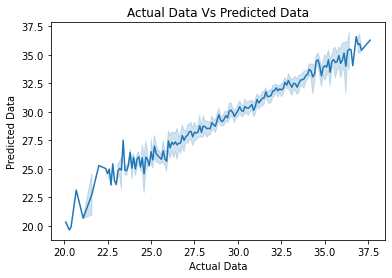

In [85]:
sns.lineplot(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [80]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 1.1144616895584234
Mean squared error : 2.117565534275863
Root mean squared error : 1.4551857387549751


In [81]:
#Lasso Regularization 
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [82]:
alpha = lasscv.alpha_
alpha

6.33686714780856e-05

In [83]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.33686714780856e-05)

In [84]:
lasso_reg.score(x_test,y_test)

0.7799361035154662

In [86]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score                  #importing requried library.

In [87]:
ada = AdaBoostRegressor()

In [88]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [89]:
y_pred = ada.predict(x_train)

In [90]:
print("R square score:",r2_score(y_train,y_pred))

R square score: 0.7748212241900948


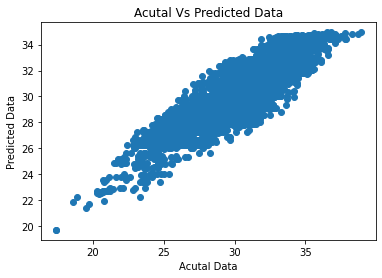

In [92]:
plt.scatter(y_train,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Predicted Data')
plt.title('Acutal Vs Predicted Data')
plt.show()

In [93]:
#HyperParameter Tunning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor                    #importing requried library.

In [94]:
dt = DecisionTreeRegressor()

In [95]:
params = {'n_estimators':[40,47,49,50],
         'learning_rate':[0.30,0.40,0.45]}

In [96]:
rad_scr = RandomizedSearchCV(AdaBoostRegressor(),cv=2,param_distributions=params)

In [97]:
rad_scr.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [98]:
rad_scr.best_params_

{'n_estimators': 50, 'learning_rate': 0.4}

In [99]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.45,n_estimators=50)

In [100]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45)

In [101]:
y_pred=ada.predict(x_test)

In [102]:
print('***Accuracy post tuning***')
print(r2_score(y_test,y_pred))

***Accuracy post tuning***
0.9147611512391123


In above outcome, main motive of using regression technique is label data is contineous. Two models used i.e., Linear and AdaBoostRegressor. Out of which AdaBoostRegressor give better model score as compare to Linear regression model.

In [103]:
#saving Model

import joblib  #importin requried library
joblib.dump(regression,"TemperaturePredictionModel-Next_Tmax.pkl")

['TemperaturePredictionModel-Next_Tmax.pkl']

B. By keeping Next_Tmin as Target Value

In [104]:
#splitting dataset into x and y.


y = df['Next_Tmin']
x = df.drop(columns=['Next_Tmin'])

In [105]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [106]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [107]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66616477, -0.37281249, -0.75861043, ...,  1.11783472,
         1.52156079, -0.38547975],
       [-1.52742848,  0.70823731, -0.67550807, ..., -0.54088007,
         1.23354808,  0.0649758 ],
       [-1.38869219,  0.60688889,  0.03086208, ..., -0.72202467,
         1.22013171,  0.25802819],
       ...,
       [ 1.52476993, -2.19708403, -2.29600427, ..., -0.75401714,
        -2.10127113, -0.54635674],
       [ 1.66350622, -2.23086683, -2.42065782, ..., -0.71822647,
        -2.07104049, -0.80375991],
       [-1.66616477, -3.31191663, -4.95528009, ..., -0.84446191,
        -2.35495433, -4.1500012 ]])

In [108]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

Model training using ML algorithm

In [109]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [110]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

22.943101041960727
[-0.07111087  0.00350974  0.81182011  0.03425329 -0.08473347 -0.77721694
  1.43206849  0.06344747 -0.11160567 -0.04045156  0.11880393 -0.13211943
  0.10402097 -0.01642414 -0.10364247  0.07707667 -0.08071972  0.00457681
  0.02708991 -0.29665518  0.24089336  0.06276625  1.00115216]


In [111]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.8277443047575858

In [112]:
regression.score(x_test,y_test)

0.8246319249971018

In [113]:
y_pred = regression.predict(x_test)
y_pred

array([20.05935153, 20.14075765, 24.35698864, ..., 26.57377531,
       24.32330263, 20.72554205])

In [114]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
7436,21.4,20.059352
3476,19.8,20.140758
7017,26.0,24.356989
920,22.3,24.157454
7557,24.0,23.530429
1529,20.7,21.731495
6715,26.5,25.528581
4114,23.8,24.155896
3735,24.1,24.040896
1084,23.9,24.791355


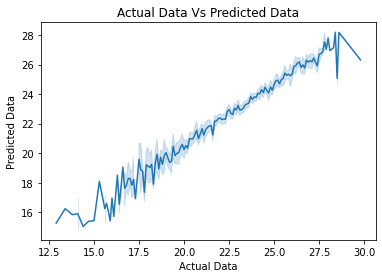

In [115]:
sns.lineplot(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [116]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.8183753489691804
Mean squared error : 1.100326576468367
Root mean squared error : 1.0489645258388707


In [117]:
#Lasso Regularization 
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [118]:
alpha = lasscv.alpha_
alpha

2.6162772324723727e-05

In [119]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.6162772324723727e-05)

In [120]:
lasso_reg.score(x_test,y_test)

0.8246329548052508

In [121]:
ada = AdaBoostRegressor()

In [122]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [123]:
y_pred = ada.predict(x_train)

In [124]:
print("R square score:",r2_score(y_train,y_pred))

R square score: 0.8279037000519314


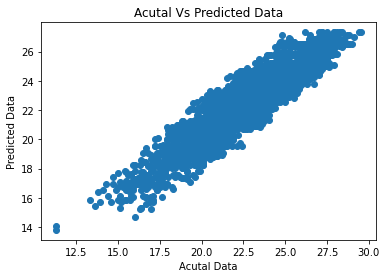

In [125]:
plt.scatter(y_train,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Predicted Data')
plt.title('Acutal Vs Predicted Data')
plt.show()

In [126]:
#HyperParameter Tunning using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor                    #importing requried library.

In [127]:
dt = DecisionTreeRegressor()

In [128]:
params = {'n_estimators':[40,47,49,50],
         'learning_rate':[0.30,0.40,0.45]}

In [129]:
rad_scr = RandomizedSearchCV(AdaBoostRegressor(),cv=2,param_distributions=params)

In [130]:
rad_scr.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [131]:
rad_scr.best_params_

{'n_estimators': 50, 'learning_rate': 0.45}

In [132]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [133]:
y_pred=ada.predict(x_test)

In [134]:
print('***Accuracy post tuning***')
print(r2_score(y_test,y_pred))

***Accuracy post tuning***
0.8166767940613302


In above outcome, main motive of using regression technique is label data is contineous. Two models used i.e., Linear and AdaBoostRegressor. Out of which AdaBoostRegressor give better model score as compare to Linear regression model.

In [135]:
#saving Model

import joblib  #importin requried library
joblib.dump(regression,"TempearaturePredictionModel-Next_Tmin.pkl")

['TempearaturePredictionModel-Next_Tmin.pkl']